## Part 1 ‑ Exploratory data analysis

    The attached logins.json file contains (simulated) timestamps of user logins in a particular
    geographic location. Aggregate these login counts based on 15­minute time intervals, and
    visualize and describe the resulting time series of login counts in ways that best characterize the
    underlying patterns of the demand. Please report/illustrate important features of the demand,
    such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading json file
logins_df = pd.read_json('logins.json')

In [3]:
# Viewing first few row of the data
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Shape of the dataset
logins_df.shape

(93142, 1)

In [5]:
# Viewing botton few row of the data
logins_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [6]:
# Checking column information of the dataset
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
# Create new column to store count of each login
logins_df['count'] = 1

In [8]:
# Viewing the data set
logins_df.sample(2)

,login_time,count
17596,1970-01-26 12:11:21,1
43257,1970-02-26 20:41:38,1


In [9]:
# Set index as login time for further analysis
logins_df.set_index('login_time', inplace=True)

In [11]:
# resampel the data based on 15 min interval
df_sampled = logins_df.resample("15T").agg('sum')

In [12]:
df_sampled.reset_index(inplace=True)

In [13]:
df_sampled.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [14]:
df_sampled.shape

(9788, 2)

Text(0.5, 1.0, 'Logins at 15 min increments')

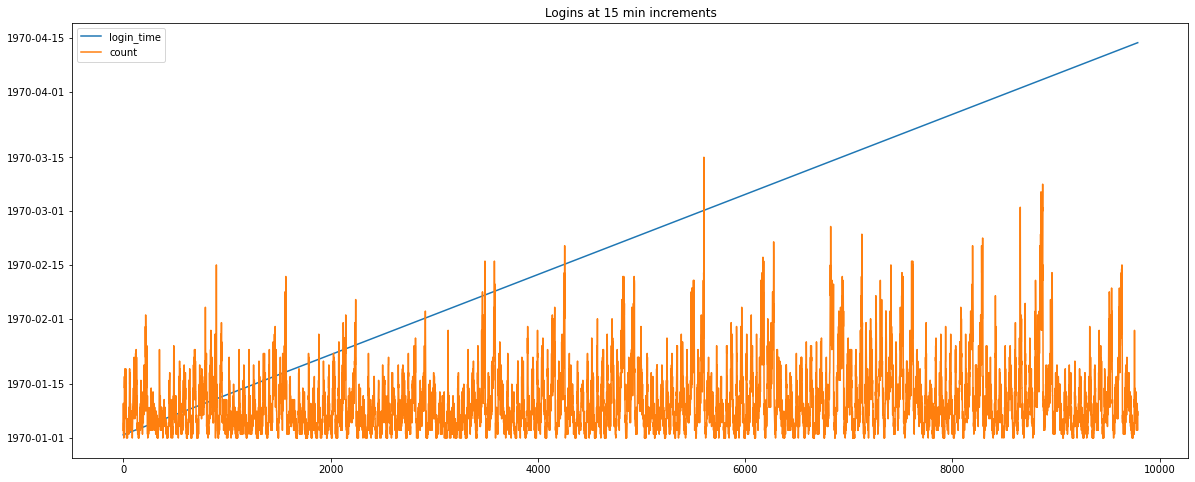

In [18]:
df_sampled.plot(kind="line", figsize=(20, 8))
plt.title("Logins at 15 min increments")

We can see that this data covers several months, and there is strong seasonality. In addition there are some obvious spikes.

In [24]:
# Creating new column to store year value
df_sampled['year'] = df_sampled['login_time'].dt.year

In [25]:
# Creating new column to store month value
df_sampled['month'] = df_sampled['login_time'].dt.month

In [26]:
# Creating new column to store day value
df_sampled['day'] = df_sampled['login_time'].dt.day

In [27]:
# Creating new column to store hour value
df_sampled['hour'] = df_sampled['login_time'].dt.hour

In [28]:
# Creating new column to store minute value
df_sampled['min'] = df_sampled['login_time'].dt.minute

In [29]:
# Creating new column to store date value
df_sampled['data'] = df_sampled['login_time'].dt.date

In [30]:
# Creating new column to store time value
df_sampled['time'] = df_sampled['login_time'].dt.time

In [37]:
df_sampled['weekday']= df_sampled['login_time'].dt.day_name()

In [45]:
df_sampled['week']= df_sampled['login_time'].dt.week

d:\study\ds\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [46]:
df_sampled.head()

,login_time,count,year,hour,min,month,day,data,time,weekday,week
0,1970-01-01 20:00:00,2,1970,20,0,1,1,1970-01-01,20:00:00,Thursday,1
1,1970-01-01 20:15:00,6,1970,20,15,1,1,1970-01-01,20:15:00,Thursday,1
2,1970-01-01 20:30:00,9,1970,20,30,1,1,1970-01-01,20:30:00,Thursday,1
3,1970-01-01 20:45:00,7,1970,20,45,1,1,1970-01-01,20:45:00,Thursday,1
4,1970-01-01 21:00:00,1,1970,21,0,1,1,1970-01-01,21:00:00,Thursday,1


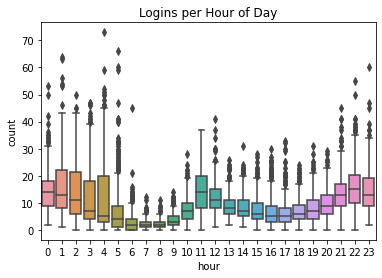

In [39]:
sns.boxplot(data=df_sampled, x='hour', y='count')
plt.title('Logins per Hour of Day');

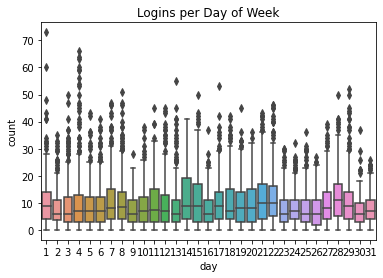

In [40]:
sns.boxplot(data=df_sampled, x='day', y='count')
plt.title('Logins per Day of Week');

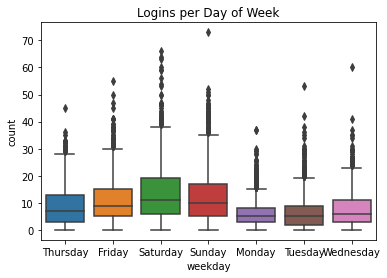

In [42]:
sns.boxplot(data=df_sampled, x='weekday', y='count')
plt.title('Logins per Day of Week');

<AxesSubplot:title={'center':'Login Count by Day of Week'}, xlabel='weekday'>

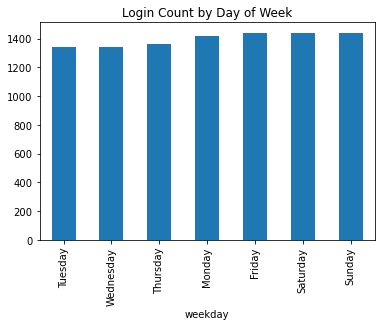

In [41]:
df_sampled.groupby(['weekday'])['weekday'].count().sort_values().plot(kind='bar', title="Login Count by Day of Week")

<AxesSubplot:title={'center':'Login Count by Week of Year'}, xlabel='week'>

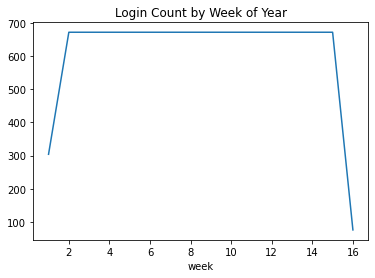

In [47]:
df_sampled.groupby(['week'])['day'].count().plot(title="Login Count by Week of Year")

<AxesSubplot:title={'center':'Login Count by Time'}, xlabel='time'>

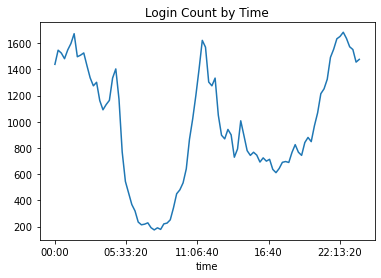

In [48]:
df_sampled.groupby(['time'])['count'].sum().plot(title = "Login Count by Time")

## Result


##### The number of trips have slight increase through the months but the general trend seems to be the same. There is a clear and understandable dip in number of trips in the early morning time. There are two peaks in a day. Around Morning 11 and in late evening


##### We can see from these plots the patterns over the hours of the day and the days of the week. We can also see that we have many outliers. However I would assume that these outliers are indeed real data due to the nature of logins.

# Part 2 ‑ Experiment and metrics design

    The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
    weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
    during the day. On weekends, there is reasonable activity in both cities.
    However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
    to be exclusive to each city. The Ultimate managers of city operations for the two cities have
    proposed an experiment to encourage driver partners to be available in both cities, by
    reimbursing all toll costs.
    
* What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
* Describe a practical experiment you would design to compare the effectiveness of theproposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of theobservation
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

1. I would choose median wait time. with current things customers in Gotham wait longer for a driver at night, and customer in metropolis wait longer for a driver during day. By encouraging driver partners to flow back and forth between cities, drivers will be able to go where the demand is, and the overall wait time at busy times should decrease. The median wait time is direclty related to customer satisfaction time. I choosed median over mean because the data tend to have some outliers interms of long wait times. 

2. I would reimburse all toll costs for the period of a month. During this time I would monitor wait times for drivers. Null hypothesis would be that the average wait time did not change as compared with the previous month. I don't think we can assume that these distributions would be normally distributed, so I would run a permutation test. I would randomly sample with replacement from both distributions, and calcuate the difference in medians between the two. Then I would compare this distribution with the overall difference in medians. I would then calculate the confidence interval that the observed difference in medians likes within the distribution of the distribution of our permutation medians. If it does not, we can reject the null hypothesis and assume that the reimbursement of tolls impacted wait time. If it does, we cannot assume that.

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [3]:
# Reading json file into pandas dataframe
ultimate_df = pd.read_json('ultimate_data_challenge.json')

In [4]:
ultimate_df.shape

(50000, 12)

In [5]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [8]:
# Range of sign up dates
print(ultimate_df.signup_date.min(), ultimate_df.signup_date.max())

2014-01-01 2014-01-31


In [9]:
# Range of last trip dates
print(ultimate_df.last_trip_date.min(), ultimate_df.last_trip_date.max())

2014-01-01 2014-07-01


In [10]:
# Removing null values
ultimate_wo_na = ultimate_df.dropna().copy()
ultimate_wo_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
ultimate_wo_na.shape

(41445, 12)

<AxesSubplot:title={'center':'Users by City'}, xlabel='city'>

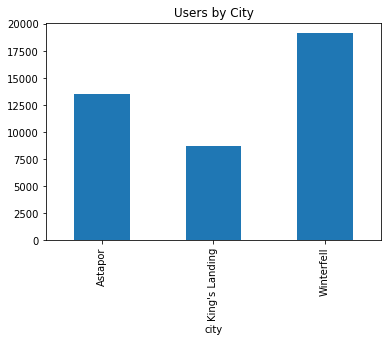

In [12]:
# City volumes
ultimate_wo_na.groupby(['city'])['city'].count().plot(kind="bar", title="Users by City")

<AxesSubplot:title={'center':'Avg Rating BY Driver Trend'}, xlabel='avg_rating_by_driver'>

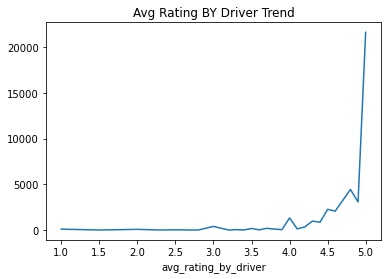

In [13]:
# Check ratings 1-5
ultimate_wo_na.groupby(['avg_rating_by_driver'])['avg_rating_by_driver'].count().plot(title="Avg Rating BY Driver Trend")

<AxesSubplot:title={'center':'Avg Rating OF Driver Trend'}, xlabel='avg_rating_of_driver'>

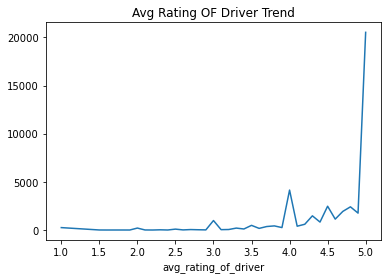

In [14]:
# average rating of driver trend
ultimate_wo_na.groupby(['avg_rating_of_driver'])['avg_rating_of_driver'].count().plot(title="Avg Rating OF Driver Trend")

In [15]:
# Check outliers of trips in first 30 days
ultimate_wo_na.trips_in_first_30_days.sort_values(ascending=False).head()

18514    125
99        73
3030      71
29070     63
48804     58
Name: trips_in_first_30_days, dtype: int64

In [16]:
ultimate_wo_na.trips_in_first_30_days.median()

1.0

In [17]:
# City ratings
ultimate_wo_na.groupby(['city'])['avg_rating_by_driver'].mean()

city
Astapor           4.794766
King's Landing    4.851897
Winterfell        4.728976
Name: avg_rating_by_driver, dtype: float64

In [18]:
ultimate_wo_na.groupby(['city'])['avg_rating_of_driver'].mean()

city
Astapor           4.630883
King's Landing    4.707943
Winterfell        4.532514
Name: avg_rating_of_driver, dtype: float64

In [19]:
# City distance
ultimate_wo_na.groupby(['city'])['avg_dist'].mean()

city
Astapor           5.151244
King's Landing    5.714379
Winterfell        5.561285
Name: avg_dist, dtype: float64

In [20]:
# City weekdays
ultimate_wo_na.groupby(['city'])['weekday_pct'].mean()

city
Astapor           60.702265
King's Landing    63.480046
Winterfell        60.625484
Name: weekday_pct, dtype: float64

In [21]:
# Check outliers of average surge
ultimate_wo_na.avg_surge.sort_values(ascending=False).head()

13861    8.00
30477    5.75
2817     5.00
19191    5.00
1405     4.75
Name: avg_surge, dtype: float64

In [22]:
city_riders = pd.DataFrame(ultimate_wo_na.groupby(['city'])['city'].count())
city_riders.columns = ["riders"]
city_riders

,riders
city,
Astapor,13509
King's Landing,8775
Winterfell,19161


In [23]:
city_riders = pd.DataFrame(ultimate_wo_na.groupby(['city'])['city'].count())
city_riders.columns = ["riders"]

In [24]:
city_UB = pd.DataFrame(ultimate_wo_na[ultimate_wo_na.ultimate_black_user==True].groupby(['city'])['city'].count())
city_UB.columns = ["UB"]
city_ridersUB = city_riders.merge(city_UB, on="city")
city_ridersUB['rate'] = city_ridersUB.UB / city_ridersUB.riders
city_ridersUB

,riders,UB,rate
city,,,
Astapor,13509,5406,0.400178
King's Landing,8775,3708,0.422564
Winterfell,19161,6805,0.355148


<AxesSubplot:title={'center':'Rider Phone Type'}, xlabel='phone'>

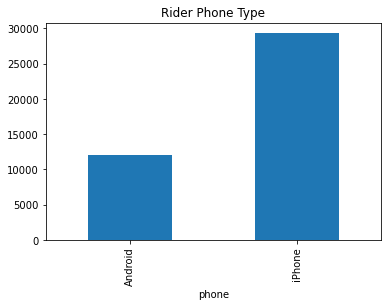

In [25]:
# Check phone use
ultimate_wo_na.groupby(['phone'])['phone'].count().plot(kind="bar", title="Rider Phone Type")

In [26]:
# Convert to datetime
ultimate_wo_na.last_trip_date = pd.to_datetime(ultimate_wo_na.last_trip_date)
ultimate_wo_na.last_trip_date = ultimate_wo_na.last_trip_date.dt.normalize()

In [28]:
from datetime import datetime, timedelta

In [29]:
# Identify active riders, last trip within 30 days
ultimate_wo_na['active'] = False
ultimate_wo_na.loc[(ultimate_wo_na.last_trip_date >= ultimate_wo_na.last_trip_date.max()-timedelta(30)), 'active'] = True

* Inital dataset contain 50000 samples, after removing null values it end up 41445 sample which is 83% of the data
* Most riders from Winterfell, least from King's Landing, and ratings averages are close
* Most Ultimate Black riders from Winterfell, but 36% of riders. 40 - 42% out of Astapor and King's Landing
* Average ride in Winterfell and King's Landing is about 5.5 - 5.7 miles, and less at Astapor about 5.2
* The three cities average about 60-63% weekday use
* half of review ratings were 5 stars, both OF and BY drivers.
* There are outliers of "power riders" with very many trips in the first 30 days, which has a mean of 2.3 and median of 1 trip
* About a third of riders will experience volume surge, with one rider jumping to a multiplier of 8
* Most riders use iPhone over Android by more than double
* 41% of riders are active, riding within the last 30 days

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [31]:
# Drop date fields not being used in model
df = ultimate_wo_na.drop(['signup_date', 'last_trip_date'], axis=1)

In [32]:
# Convert city names to alphabetical order, 1, 2, 3
df['city_num'] = 1
df.loc[(df.city == "King's Landing"), 'city_num'] = 2
df.loc[(df.city == "Winterfell"), 'city_num'] = 3
df.city_num.value_counts()

3    19161
1    13509
2     8775
Name: city_num, dtype: int64

In [33]:
# Convert phone to binary
df['phone01'] = df['phone'].apply(lambda x: 1 if x == "iPhone" else 0)

In [34]:
# Convert active to binary
df['active01'] = df['active'].apply(lambda x: 1 if x == True else 0)

In [35]:
# Convert ultimate_black_user to binary
df['ub01'] = df['ultimate_black_user'].apply(lambda x: 1 if x == True else 0)

In [38]:
# Separate X, y, train, test, validate samples
y = df.active01
X = df.drop(['active', 'active01', 'phone', 'city', 'ultimate_black_user'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, stratify=y)

In [39]:
# Steps, pipeline, scale, fit
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression(random_state = 7))]
pipeline = Pipeline(steps)
logreg_scaled = pipeline.fit(X_train, y_train)

In [40]:
# Accuracy on testing
print("The testing accuracy is "+"{:.1%}".format(logreg_scaled.score(X_test, y_test)))

The testing accuracy is 67.3%


In [41]:

# 5-fold cross-validation scores
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.67667994 0.67788636 0.66775244 0.67933406 0.68259139]
Average 5-Fold CV Score: 0.6768488358064905


In [42]:
# Classification Report
y_pred = logreg_scaled.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      4882
           1       0.63      0.49      0.55      3407

    accuracy                           0.67      8289
   macro avg       0.66      0.65      0.65      8289
weighted avg       0.67      0.67      0.66      8289



In [43]:
# confusion matrix percentages
cm = confusion_matrix(y_test, y_pred)
cmpct = cm / cm.sum(axis=1).reshape(-1,1)
print(cmpct)

[[0.79782876 0.20217124]
 [0.50631054 0.49368946]]


The model is strongest predicting riders who fail to remain active and 50% accuracy identifying those who remain active. This may be impacted by the data having 41% active riders and over-represented by the inactive riders

In [44]:
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_num', 'phone01', 'ub01']

In [45]:

# Check coefficients
logreg = LogisticRegression(random_state = 7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
logreg.fit(X_train,y_train)
std_coef = logreg.coef_.reshape(-1,1).tolist()
feature_names = [feature.title() for feature in features]
coef_df = pd.DataFrame(std_coef,index=feature_names,columns=['coef'])
coef_df['abs'] = coef_df['coef'].abs()
coef_df = coef_df.sort_values(by='abs',ascending=False).drop('abs',axis=1)
pd.set_option('display.max_rows', None)
print(coef_df)

                            coef
Phone01                 1.119512
Ub01                    0.860554
Avg_Surge              -0.729186
City_Num                0.179268
Avg_Rating_By_Driver   -0.133640
Trips_In_First_30_Days  0.101255
Avg_Rating_Of_Driver   -0.054116
Avg_Dist               -0.032929
Surge_Pct               0.009496
Weekday_Pct             0.000502


d:\study\ds\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
# Check correlations
df.drop(['active', 'ultimate_black_user'], axis=1).corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_num,phone01,active01,ub01
trips_in_first_30_days,1.000000,-0.011849,-0.000262,0.005370,0.055556,-0.136471,-0.045788,0.059013,0.056367,0.198816,0.115066
avg_rating_of_driver,-0.011849,1.000000,-0.022209,-0.001696,0.012975,0.034877,0.122413,-0.076782,-0.027327,-0.011829,-0.003292
avg_surge,-0.000262,-0.022209,1.000000,0.795737,-0.118999,-0.085750,0.012418,-0.035643,0.013029,-0.004185,-0.070613
surge_pct,0.005370,-0.001696,0.795737,1.000000,-0.155179,-0.110894,0.019703,-0.064992,0.014561,0.011126,-0.099814
weekday_pct,0.055556,0.012975,-0.118999,-0.155179,1.000000,0.102048,0.018312,-0.003630,0.004060,0.010423,0.033964
avg_dist,-0.136471,0.034877,-0.085750,-0.110894,0.102048,1.000000,0.083190,0.032668,-0.025115,-0.089498,0.027206
avg_rating_by_driver,-0.045788,0.122413,0.012418,0.019703,0.018312,0.083190,1.000000,-0.078651,-0.012638,-0.034720,0.005708
city_num,0.059013,-0.076782,-0.035643,-0.064992,-0.003630,0.032668,-0.078651,1.000000,0.002430,0.073666,-0.043649
phone01,0.056367,-0.027327,0.013029,0.014561,0.004060,-0.025115,-0.012638,0.002430,1.000000,0.233722,0.076271
active01,0.198816,-0.011829,-0.004185,0.011126,0.010423,-0.089498,-0.034720,0.073666,0.233722,1.000000,0.217365



Logistic regression is a great baseline algorithm for predicting a binary outcome, such as this example whether a rider will still be active in six months. The relationship between the features and target are not too complex, and the feature weights are interpretable so that the results can be shared with the managers of Ultimate. Another alternative to consider is Random Forest to improve classification for its additional robustness, less preprocessing and reduced impact of correlations.

67% accuracy allows rider planning by Ultimate managers better than a 50/50 guess or trial and error. Obviously, frequency of trips is an indicator of success, as well as utilizing Ultimate Black. Ultimate can offer incentives to encourage lower frequency users to try more often and "get hooked", or note the ability to avoid congestion surges. Also, the indication that type of phone is important suggests comparing the ease of use of the rider software between the devices.